# Boston AirBnb Data

In [1]:
# Python Imports

import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

### Cleaning of Listing Data

In [2]:
# Cleaning the listings data

# Loading data from csv files
listings_dataframe = pd.read_csv('listings.csv')

# replacing NaN values with 0
listings_dataframe.fillna(0, inplace=True)

# Extracting prices from the table
price = listings_dataframe['price']
prices=[]

# converting prices into a float value
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

# replace the price column with the new column
listings_dataframe['price']=prices

# exclude the listings with 0 for price,beds,bedrooms,accomodates etc
listings_dataframe = listings_dataframe[listings_dataframe.bathrooms >0]
listings_dataframe = listings_dataframe[listings_dataframe.bedrooms > 0]
listings_dataframe = listings_dataframe[listings_dataframe.beds > 0]
listings_dataframe = listings_dataframe[listings_dataframe.price  > 0]
listings_dataframe = listings_dataframe[listings_dataframe.review_scores_rating  > 0]
listings_dataframe = listings_dataframe[listings_dataframe.reviews_per_month > 0]
listings_dataframe = listings_dataframe[listings_dataframe.accommodates  > 0]
listings_dataframe.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,3075044,https://www.airbnb.com/rooms/3075044,2.020000e+13,9/7/2016,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,0.0,0.0,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,2.020000e+13,9/7/2016,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,0.0,0.0,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,2.020000e+13,9/7/2016,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,0.0,0.0,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,2.020000e+13,9/7/2016,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,0.0,0.0,f,flexible,f,f,1,2.25
5,12386020,https://www.airbnb.com/rooms/12386020,2.020000e+13,9/7/2016,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,none,We love our corner of Roslindale! For quiet wa...,...,10.0,f,0.0,0.0,f,flexible,f,f,1,1.70


In [3]:
listings_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 1 to 3583
Data columns (total 95 columns):
id                                  2506 non-null int64
listing_url                         2506 non-null object
scrape_id                           2506 non-null float64
last_scraped                        2506 non-null object
name                                2506 non-null object
summary                             2506 non-null object
space                               2506 non-null object
description                         2506 non-null object
experiences_offered                 2506 non-null object
neighborhood_overview               2506 non-null object
notes                               2506 non-null object
transit                             2506 non-null object
access                              2506 non-null object
interaction                         2506 non-null object
house_rules                         2506 non-null object
thumbnail_url                       25

In [4]:
## We decide on the columns to take
final_dataframe = listings_dataframe[['host_response_rate','host_acceptance_rate','host_is_superhost','host_total_listings_count','host_identity_verified','latitude','longitude','accommodates','bathrooms','bedrooms','beds','guests_included','minimum_nights','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','reviews_per_month']]
final_dataframe.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
1,100.0,100.0,f,1,t,42.286241,-71.134374,2,1.0,1.0,...,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,t,1.30
2,100.0,88.0,t,1,t,42.292438,-71.135765,2,1.0,1.0,...,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,f,0.47
3,100.0,50.0,f,1,f,42.281106,-71.121021,4,1.0,1.0,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1.00
4,100.0,100.0,t,1,t,42.284512,-71.136258,2,1.5,1.0,...,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,f,2.25
5,100.0,95.0,t,2,t,42.291690,-71.131893,2,1.0,1.0,...,8,100.0,10.0,10.0,10.0,10.0,9.0,10.0,f,1.70


In [5]:
final_dataframe = final_dataframe.replace('f',0)
final_dataframe = final_dataframe.replace('t',1)
final_dataframe.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
1,100.0,100.0,0,1,1,42.286241,-71.134374,2,1.0,1.0,...,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,1.30
2,100.0,88.0,1,1,1,42.292438,-71.135765,2,1.0,1.0,...,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0,0.47
3,100.0,50.0,0,1,0,42.281106,-71.121021,4,1.0,1.0,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.00
4,100.0,100.0,1,1,1,42.284512,-71.136258,2,1.5,1.0,...,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,0,2.25
5,100.0,95.0,1,2,1,42.291690,-71.131893,2,1.0,1.0,...,8,100.0,10.0,10.0,10.0,10.0,9.0,10.0,0,1.70


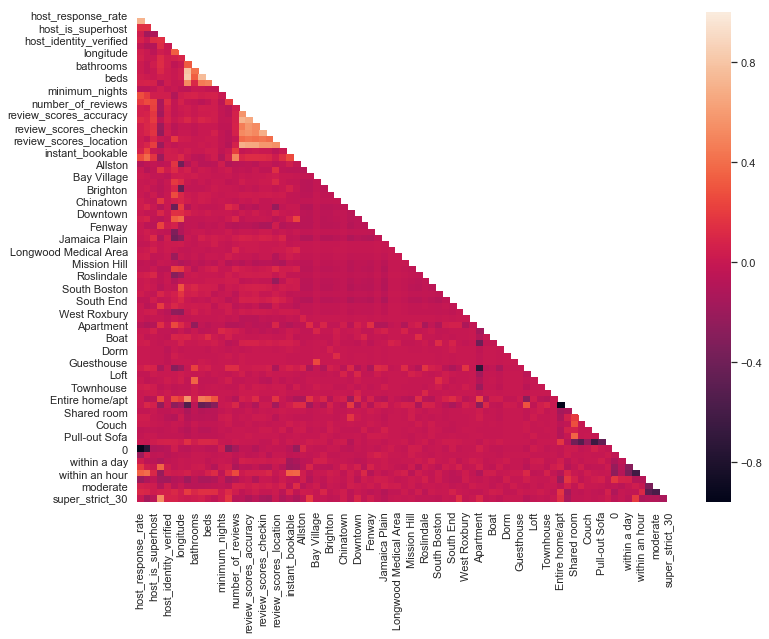

In [19]:
# plot correlations by color using seaborn's heatmap
# set figure size for better visibility 
sns.set(rc={'figure.figsize':(12,9)})
correlation_matrix = final_dataframe.corr().round(2)
# In mask, data will not be shown in cells for the upper indices of the squared matrix where mask = true.
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
# annot = False to not print the values inside the square
with sns.axes_style("white"):
    sns.heatmap(data=correlation_matrix, mask=mask, annot=False)

In [7]:
## We are going to categorically classify these columns into numerical value
for categorical_feature in ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type','host_response_time','cancellation_policy']:
    final_dataframe = pd.concat([final_dataframe, pd.get_dummies(listings_dataframe[categorical_feature])], axis=1)
final_dataframe.fillna(0)
final_dataframe.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,...,Real Bed,0,a few days or more,within a day,within a few hours,within an hour,flexible,moderate,strict,super_strict_30
1,100.0,100.0,0,1,1,42.286241,-71.134374,2,1.0,1.0,...,1,0,0,0,0,1,0,1,0,0
2,100.0,88.0,1,1,1,42.292438,-71.135765,2,1.0,1.0,...,1,0,0,0,1,0,0,1,0,0
3,100.0,50.0,0,1,0,42.281106,-71.121021,4,1.0,1.0,...,1,0,0,0,1,0,0,1,0,0
4,100.0,100.0,1,1,1,42.284512,-71.136258,2,1.5,1.0,...,1,0,0,0,0,1,1,0,0,0
5,100.0,95.0,1,2,1,42.291690,-71.131893,2,1.0,1.0,...,1,0,0,0,1,0,1,0,0,0


### Cleaning of Calendar Data

In [8]:
## We load the calendar file for the prices which we will use as target
target = pd.read_csv("calendar.csv")[['listing_id','price']]

###### SInce Calendar file is a timeseries of prices for each day, we get the mean of each price

In [9]:
## We get the unique listing values
target.listing_id.unique

## Here we clean the prices to get the numeric value 
target["price"] = target["price"].str.replace("[$,]", "").astype("float")
target.fillna(0) ### We remove all null values by replacing it with zero, since they are not available 

### Calendar data being a timeseries we get the mean price of all prices for each listing
target=target.groupby(['listing_id']).mean() 
target.head(20)

,price
listing_id,
3353,35.204819
5506,147.267442
6695,197.407407
6976,65.000000
8792,154.000000
9273,225.000000
9765,236.856354
9824,222.321981
9855,266.554945


# Linear Regression

In [10]:
# from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [11]:
# Defining Independent variables and Dependent Variables
X = final_dataframe

Y = listings_dataframe["price"]

In [12]:
# Splitting the data into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=9)

In [13]:
# Fitting the model using training data set
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
# Predicting prices for test data set
predictions = linear_regression_model.predict(X_test)

In [15]:
# Checking the accuracy of the prediction using RootMeanSquare and R2 method
test_set_rmse = (np.sqrt(mean_squared_error(Y_test, predictions)))
test_set_r2 = r2_score(Y_test, predictions)

In [16]:
# Printing out the accuracy metrics
print("Accuracy Metric using Root Mean Square Method", + test_set_rmse)
print("Accuracy Metric using R2 score Method", + test_set_r2)

Accuracy Metric using Root Mean Square Method 59.93836002597064
Accuracy Metric using R2 score Method 0.6679180419928723


For Root mean square method the lower the value is, the better is the fit